In [1]:
import re
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task1. Get ftps

In [2]:
req1 = requests.get("https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/references")
text1 = req1.text

In [3]:
ftps = re.findall(r'ftp\..+?(?=[\t;])', text1)
with open('ftps.txt', 'a') as file:
    for strings in ftps:
        file.write(strings+'\n')

# Task2. Get digits

In [4]:
req2 = requests.get("https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/2430AD")
text2 = req2.text

In [5]:
re.findall(r'\d+', text2)

['2430',
 '1969',
 '2430',
 '2430',
 '57',
 '57',
 '1970',
 '3',
 '68',
 '35',
 '460',
 '2430']

# Task 3. Get words with 'a'

In [6]:
re.findall(r'\w*[Aa]\w*', text2)

['A',
 'and',
 'dawn',
 'and',
 'all',
 'ache',
 'have',
 'a',
 'nightmare',
 'a',
 'are',
 'all',
 'and',
 'a',
 'gleam',
 'anywhere',
 'an',
 'original',
 'a',
 'personality',
 'packed',
 'talk',
 'said',
 'Alvarez',
 'said',
 'Social',
 'eventually',
 'An',
 'character',
 'escaped',
 'adjustment',
 'talking',
 'irritates',
 'past',
 'tact',
 'along',
 'Trail',
 'was',
 'as',
 'always',
 'sparsely',
 'have',
 'taken',
 'and',
 'Alvarez',
 'walking',
 'Alvarez',
 'was',
 'tall',
 'and',
 'rather',
 'athletic',
 'a',
 'muscular',
 'activities',
 'stairs',
 'and',
 'rampways',
 'instance',
 'almost',
 'an',
 'character',
 'and',
 'avoided',
 'sunlamps',
 'and',
 'was',
 'pale',
 'said',
 'want',
 'can',
 'have',
 'square',
 'space',
 'and',
 'has',
 'apartment',
 'Rather',
 'a',
 'a',
 'way',
 'said',
 'Alvarez',
 'And',
 'a',
 'Alvarez',
 'added',
 'matter',
 'reach',
 'peak',
 'reach',
 'reach',
 'goal',
 'All',
 'mankind',
 'And',
 'said',
 'at',
 'that',
 'way',
 'that',
 'against',

# Task 4. Get exclamatory sentences

In [7]:
re.findall(r'\w+[^.]*?!', text2)

['Yes!',
 'Literally!',
 'There was once a time!',
 'Centuries ago!',
 'Think, Cranwitz!',
 'If we succeed!']

# Task 5. Distribution of unique words 

Text(0, 0.5, 'Length count')

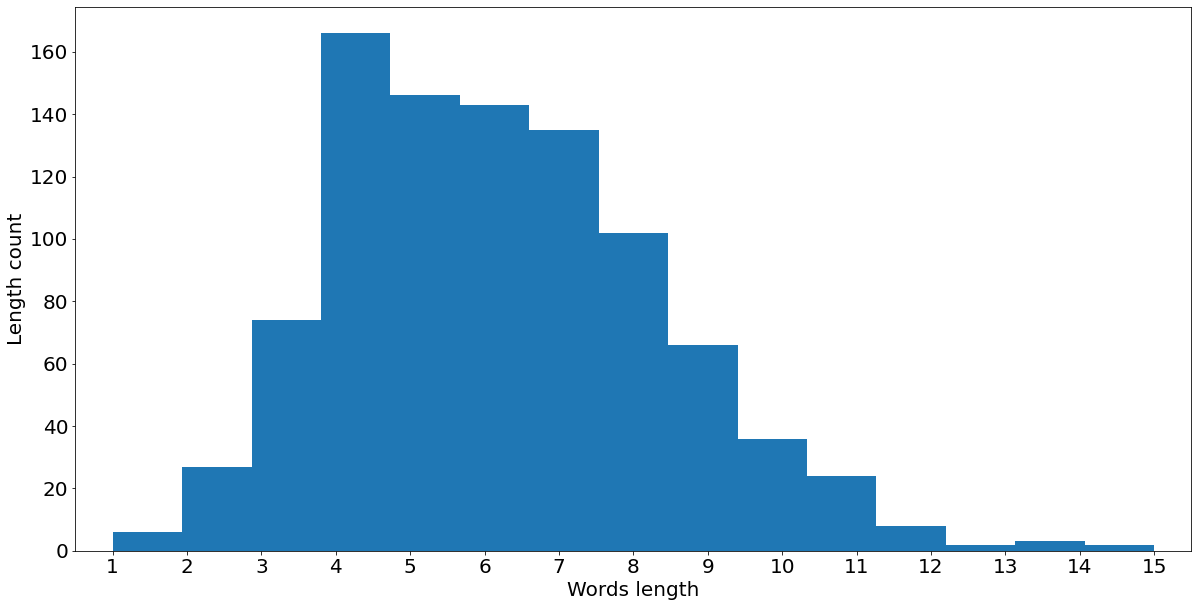

In [8]:
words = np.array(re.findall(r'\w+\'?\w*', text2))
words_unique = np.unique(np.char.lower(words))
fun_len = np.vectorize(len)
lengths = fun_len(words_unique)
lengths_unique = np.unique(lengths, return_counts=True)

plt.rcParams['font.size'] = '20'
plt.figure(figsize = (20,10))
plt.hist(lengths, bins=15)
plt.xticks(lengths_unique[0])
plt.xlim([0.5, 15.5])
plt.xlabel('Words length')
plt.ylabel('Length count')

#or bar plot 
# plt.bar(lengths_unique[0], lengths_unique[1], bins=15)

# Task6. Kirpichniy yazik

In [9]:
def kirpichniy(text):
    return re.sub(r'([ауеёыоэяиюЁУЕЫАОЭЯИЮ])', r'\1к\1', text)

# Task 7. Get sentences with n words

In [10]:
def find_n_words_sentences(text, n):
    sentences = re.findall(r'(.+?[^.!?]*)[.!?]', text)
    ans = ''
    for sentence in sentences:
        if len(sentence.split()) == n:
            ans += ''.join(sentence)
    get_word = '(\S+) '
    return re.findall(fr'{get_word*n}'[:-1], ans)